In [2]:
from keras import layers, models
from keras import datasets
from keras.utils import np_utils

In [3]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

In [7]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', 
                              input_shape=(Nin,), name="Hidden-1"))
        self.add(layers.Dropout(Pd_l[0]))
        
        self.add(layers.Dense(Nh_l[1], activation='relu', name="Hidden-2"))
        self.add(layers.Dropout(Pd_l[1]))
        
        self.add(layers.Dense(Nout, activation='softmax'))
        
        self.compile(loss='categorical_crossentropy', 
                     optimizer='adam', metrics=['accuracy'])

In [8]:
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

In [9]:
Nh_l = [100, 50]
Pd_l = [0.0, 0.0]
number_of_class = 10
Nout = number_of_class

(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)

In [11]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2, verbose=2)
performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print("Test Loss and Accuracy: ", performance_test)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 1.4885 - acc: 0.4682 - val_loss: 1.5600 - val_acc: 0.4404
Epoch 2/10
 - 3s - loss: 1.4691 - acc: 0.4770 - val_loss: 1.5441 - val_acc: 0.4520
Epoch 3/10
 - 3s - loss: 1.4574 - acc: 0.4779 - val_loss: 1.5615 - val_acc: 0.4499
Epoch 4/10
 - 3s - loss: 1.4398 - acc: 0.4868 - val_loss: 1.5293 - val_acc: 0.4630
Epoch 5/10
 - 3s - loss: 1.4376 - acc: 0.4888 - val_loss: 1.5277 - val_acc: 0.4667
Epoch 6/10
 - 3s - loss: 1.4277 - acc: 0.4899 - val_loss: 1.5471 - val_acc: 0.4556
Epoch 7/10
 - 3s - loss: 1.4202 - acc: 0.4912 - val_loss: 1.5486 - val_acc: 0.4542
Epoch 8/10
 - 3s - loss: 1.4097 - acc: 0.4972 - val_loss: 1.5408 - val_acc: 0.4568
Epoch 9/10
 - 3s - loss: 1.4013 - acc: 0.5001 - val_loss: 1.5351 - val_acc: 0.4598
Epoch 10/10
 - 3s - loss: 1.3966 - acc: 0.4990 - val_loss: 1.4927 - val_acc: 0.4729
10000/10000 [==============================] - ETA:  - 0s 36us/step
Test Loss and Accuracy:  [1.4613382709026337, 0.481

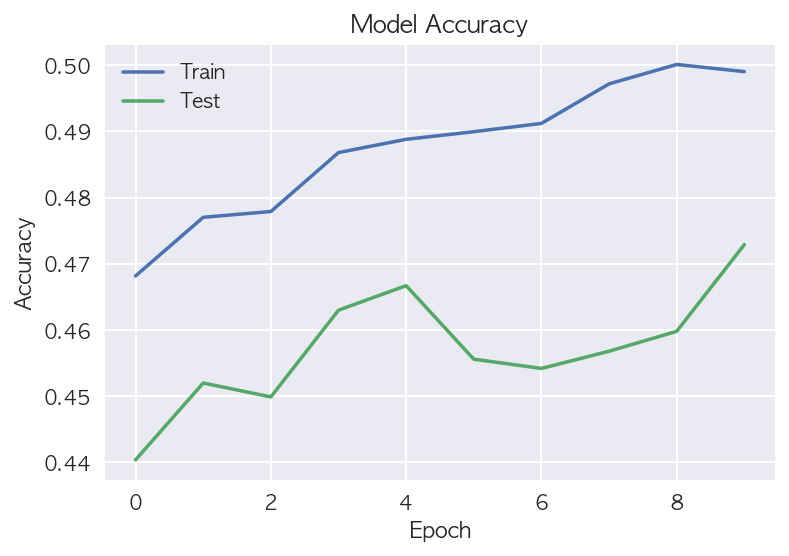

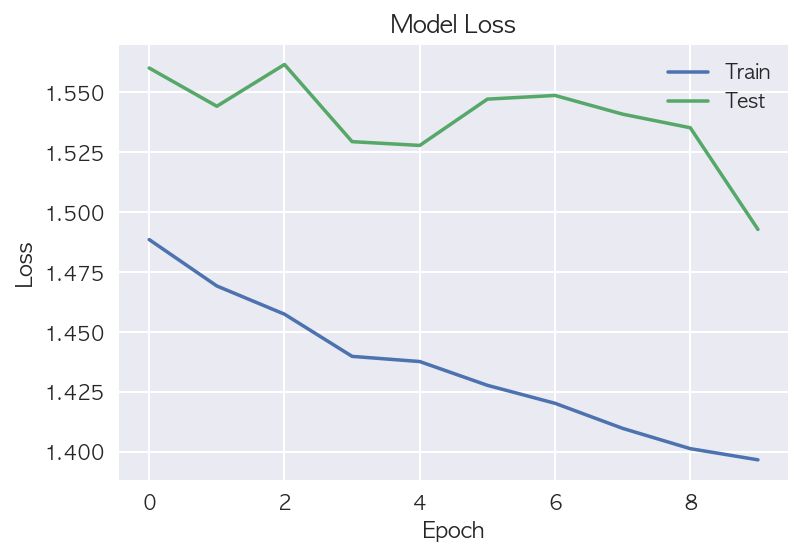

In [12]:
plot_acc(history)
plt.show()
plot_loss(history)
plt.show()